<a href="https://colab.research.google.com/github/nasif-raihan/hands-on-ML-codes/blob/main/California_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* [Data Source](https://www.kaggle.com/camnugent/california-housing-prices)
* [Followed Github](https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb)
* [Hands On Machine Learning with Scikit Learn and TensorFlow](https://github.com/yanshengjia/ml-road/blob/master/resources/Hands%20On%20Machine%20Learning%20with%20Scikit%20Learn%20and%20TensorFlow.pdf)

Having a function that downloads the data is useful in particular if the
data changes regularly:  a small script can use the function to fetch the
latest data automatically at regular intervals.

Here is the **function to fetch the data:**

In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
import tarfile            #read and write tar archives, including those using gzip, bz2 and lzma compression
import urllib.request     #urllib.request for opening and reading URLs

download_root = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
housing_path = os.path.join('datasets', 'housing')
housing_url = download_root + "datasets/housing/housing.tgz"


def fetch_housing_data(housing_url = housing_url, housing_path = housing_path):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)

  tgz_path = os.path.join(housing_path, 'housing.tgz')
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path = housing_path)
  housing_tgz.close()

In [3]:
fetch_housing_data()

Here is the **function to load the data**:

In [4]:
import pandas as pd

def load_housing_data(housing_path = housing_path):
  csv_path = os.path.join(housing_path, 'housing.csv')
  return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()

housing_original = housing.copy()

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Here it can be noticed that only **'ocean_proximity'** has **object** data type.

In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


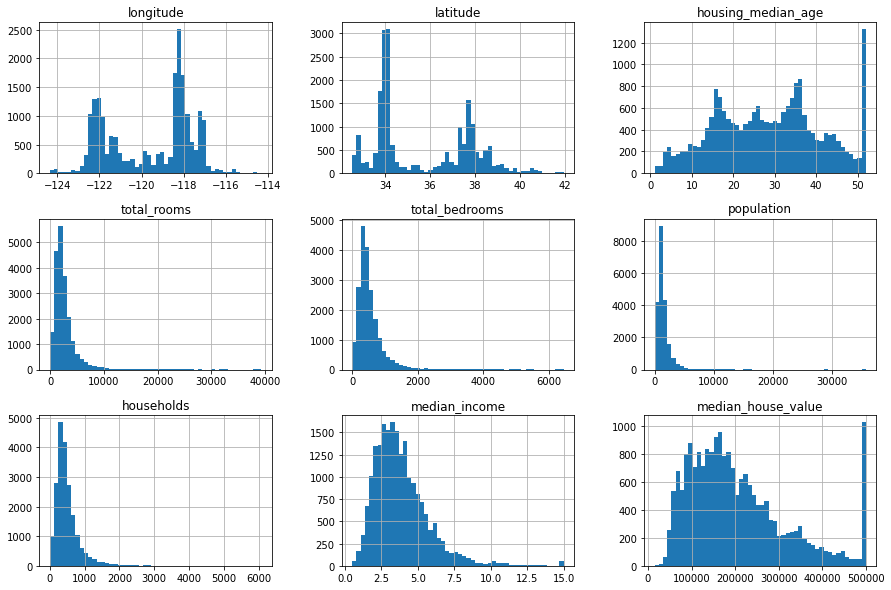

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

housing.hist(bins=50, figsize=(15, 10))
plt.savefig('attribute_histogram_plots')
plt.show()

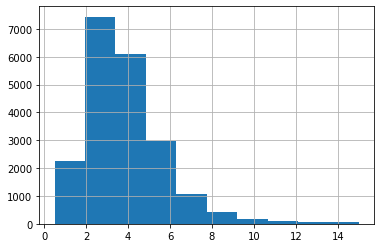

In [10]:
housing['median_income'].hist()

In [11]:
housing['income_category'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
                                    labels=[1,2,3,4,5])

housing['income_category'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_category, dtype: int64

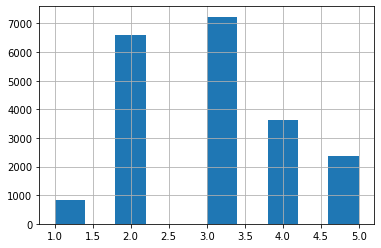

In [12]:
housing['income_category'].hist()

# **Data Visualization**

Since there is geographical information (latitude and longitude), it is a good idea to create a scatterplot of all districts to visualize the data

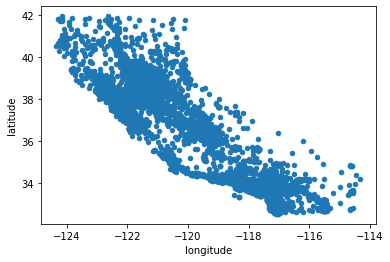

In [13]:
housing.plot(kind='scatter', x='longitude', y='latitude')

Setting the alpha option to 0.1 makes it much easier to visualize the places
where there is a high density of data points.

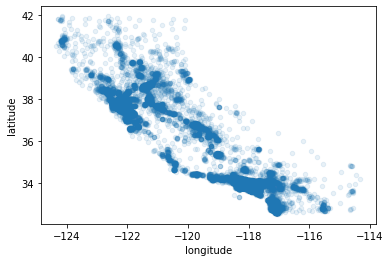

In [14]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

Now let’s look at the housing prices.

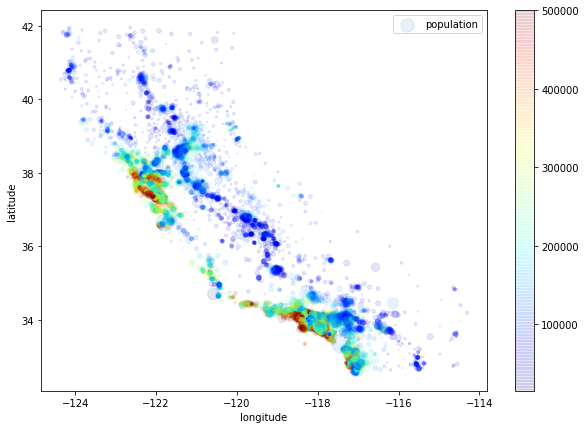

In [15]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c=housing['median_house_value'], cmap=plt.get_cmap('jet'), colorbar=True, sharex=False)
plt.legend()

This image tells us that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density.

**Looking for Correlations:**

In [16]:
corr_matrix = housing.corr()

corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

we can see a small negative correlation between the ***latitude*** and the ***median house value***(i.e., prices have a slight tendency to go down when you go north). The most promising attribute to predict the median house value is the median income, so let’s zoom in on their correlation scatterplot.

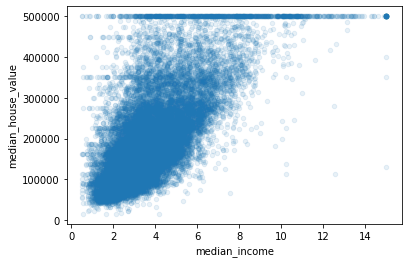

In [17]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

**Experimenting with Attribute Combinations:**
here, some interesting combination might be:


1.   the number of rooms per household
2.   total number of bedrooms with total number of rooms.
3.   population per household



In [18]:
def CombinedAttributesAdder():
  housing['rooms_per_household'] = housing['total_rooms']/housing['households']
  housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
  housing['population_per_household'] = housing['population']/housing['households']

# CombinedAttributesAdder()

In [19]:
corr_matrix = housing.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

The new **bedrooms_per_room** attribute is much more correlated with
the ***median house value*** than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive. The number of rooms per household is also more informative than the total number of rooms in a district—obviously the larger the houses, the more expensive they are.

# **Data Engineering**
**Data Cleaning**

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
imputer = SimpleImputer(strategy = 'median')

housing_num = housing_original.drop('ocean_proximity', axis=1)    #ocean_promixity contains categorical values

imputer.fit(housing_num)

imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [22]:
housing_num.median().values

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [23]:
# X = imputer.transform(housing_num)

# type(X)

The result is a plain NumPy array containing the transformed features. Let's convert it into pandas again.

In [24]:
# X = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

# X.shape

In [25]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_category'],
      dtype='object')

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [27]:
num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy='median')), #null value handled
                         ('attribs_adder', CombinedAttributesAdder()),  #extract new feature
                         ('std_scaler', StandardScaler()),  #standardization
])

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
                                   ('num', num_pipeline, num_attribs),  #neumerical value handled
                                   ('cat', OneHotEncoder(), cat_attribs)  #categorical value handled
])

In [29]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_category',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [30]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.155797,2.109842


In [31]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_labels = housing_original['median_house_value']

In [32]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.155797,2.109842


In [33]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_category',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object')

# **Making Model**

In [34]:
def display_scores(scores):
  print('Scores: ', scores)
  print('Mean: ', scores.mean())
  print('Standard deviation: ', scores.std())

In [35]:
from sklearn.metrics import mean_squared_error

## **Linear Regression**

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
all_model = []

housing_prediction = lin_reg.predict(housing_prepared)
lin_reg_mse = mean_squared_error(housing_labels, housing_prediction)
lin_reg_rmse = np.sqrt(lin_reg_mse)

all_model.append({'Linear Regression' : lin_reg_rmse})
all_model

[{'Linear Regression': 7.693696820459088e-10}]

## **Decistion Tree Regressor**

In [38]:
from sklearn.tree import DecisionTreeRegressor

DT_reg = DecisionTreeRegressor()
DT_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [39]:
housing_prediction = DT_reg.predict(housing_prepared)
DT_mse = mean_squared_error(housing_labels, housing_prediction)
DT_rmse = np.sqrt(DT_mse)

all_model.append({'Decision Tree Regressor' : DT_rmse})
all_model

[{'Linear Regression': 7.693696820459088e-10},
 {'Decision Tree Regressor': 0.0}]

## **Random Forest Regressor**

In [40]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [41]:
housing_prediction = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_prediction)
forest_rmse = np.sqrt(forest_mse)

all_model.append({'Random Forest Regressor' : forest_rmse})
all_model

[{'Linear Regression': 7.693696820459088e-10},
 {'Decision Tree Regressor': 0.0},
 {'Random Forest Regressor': 19.813232802944658}]

## **Support Vector Regressor**

In [42]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(housing_prepared, housing_labels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [43]:
housing_prediction = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_prediction)
svm_rmse = np.sqrt(svm_mse)

all_model.append({'Support Vector Regressor' : svm_rmse})
all_model

[{'Linear Regression': 7.693696820459088e-10},
 {'Decision Tree Regressor': 0.0},
 {'Random Forest Regressor': 19.813232802944658},
 {'Support Vector Regressor': 93644.91113290671}]

# **Fine tune the model**

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
for i in (lin_reg, DT_reg, forest_reg, svm_reg):
  scores = cross_val_score(i, housing_prepared, housing_labels, 
                           scoring='neg_mean_squared_error', cv=10)
  rmse = np.sqrt(-scores)
  print(i)
  print('RMSE scores: ')
  display(rmse)

  print()
  print()


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
RMSE scores: 


array([7.97054095e-11, 1.18845245e-10, 1.67050341e-10, 1.93501782e-10,
       2.45797373e-10, 1.72640274e-10, 2.26705505e-10, 1.43692220e-10,
       2.54512029e-10, 1.58497839e-10])



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
RMSE scores: 


array([ 60.24015246, 129.95974332,  91.19416897,  59.6745047 ,
       124.93215407,  63.14588744,  72.40337052,  59.34885695,
       116.01423329,  50.76927594])



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
RMSE scores: 


array([ 39.79404215, 134.42965923,  54.82689558,  32.36560615,
        76.03972787,  35.82084242,  43.81190673,  40.48970673,
        65.49633844,  42.15952332])



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
RMSE scores: 


array([ 76762.42326247,  88788.4940913 , 113047.79895625,  72760.41017647,
       122212.90945065,  94220.69281222,  69577.87460762, 108255.17385033,
       138290.23582864,  73058.17624129])